In [193]:
%load_ext autoreload
%autoreload 2
from sympy import *
import numpy as np
import matplotlib.pyplot as plt



from TwoCurveModel_OneMoving import *

Optimization terminated successfully.
         Current function value: 0.124506
         Iterations: 294
         Function evaluations: 542
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


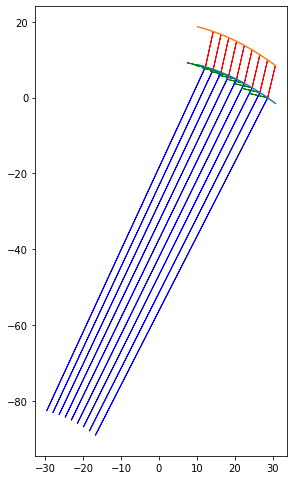

In [194]:
cm = 1/2.54 
figure, axes = plt.subplots(1,figsize=(21*cm, 21*cm),linewidth=1.22)

Yc=[sum(BBc0[j]*Bezier(j,deg,X[i]) for j in range(len(BBc0))) for i in range(len(X))]
axes.plot(X,Yc)
Yd=[sum(BBd0[j]*Bezier(j,deg,X[i]) for j in range(len(BBd0))) for i in range(len(X))]
axes.plot(X,Yd)
axes.set_aspect( 1 )
scaler=5
#norm=sqrt(max(X)**2+max(Ysol)**2)
lightSource=(S)
for i in range(1, nb):
    axes.arrow(X[i], Yc[i],float(mirrors0[i]&R.x),float(mirrors0[i]&R.y),color='red')
    axes.arrow(X[i], Yc[i],scaler*float(N0[i]&R.x),scaler*float(N0[i]&R.y),color='green')
    reflection=2*(N0[i]&lightSource)*N0[i]/(N0[i]&N0[i])-lightSource
    reflection/=sqrt(reflection&reflection)
    reflection*=scaler*20
    axes.arrow(X[i], Yc[i],float(reflection&R.x),float(reflection&R.y),color='blue')


In [173]:
BBc0

[30.0, 29.997999999999998, 29.992, 29.982]

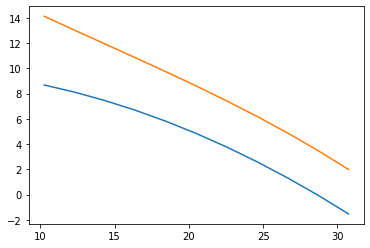

In [195]:
plt.plot(X,Ysolc)
plt.plot(X,Ysold)

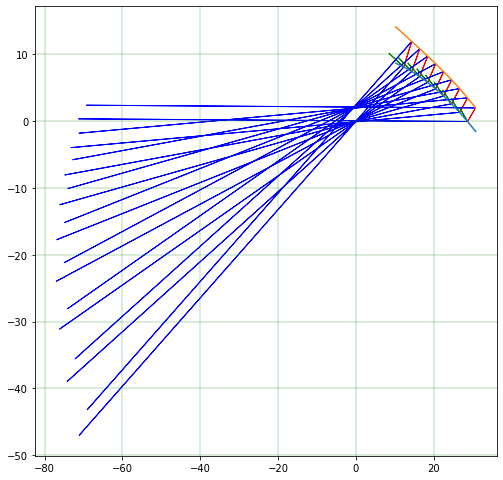

In [196]:
cm = 1/2.54 
figure, axes = plt.subplots(1,figsize=(21*cm, 21*cm),linewidth=1.2)
#axes = plt.axes(autoscale_on=False,xlim= {0,50},ylim= {-20,  5})
#axes = plt.axes(autoscale_on=True,xlim= {X[1]-5,X[1]+5},ylim= {Ysolc[1]-1500000,  Ysolc[1]+500000})

axes.plot(X,Ysolc)
axes.plot(X,Ysold)
axes.grid(color='g', linestyle='-', linewidth=0.3)
#axes.invert_xaxis()
#axes.invert_yaxis()
#axes.set_aspect( 1 )
scaler=1
for i in range(1, nb):
    axes.arrow(X[i], Ysolc[i],float(mirrorsSol[i]&R.x),float(mirrorsSol[i]&R.y),color='red')
    axes.arrow(X[i], Ysolc[i],scaler*float(Nsol[i]&R.x),scaler*float(Nsol[i]&R.y),color='green')
    reflection=2*(Nsol[i]&lightSource)*Nsol[i]/(Nsol[i]&Nsol[i])-lightSource
    reflection/=sqrt(reflection&reflection)
    reflection*=scaler*100
    axes.arrow(X[i], Ysolc[i],float(reflection&R.x),float(reflection&R.y),color='blue')
    axes.arrow(X[i+1], Ysold[i+1],float(reflection&R.x),float(reflection&R.y),color='blue')

In [197]:
from ConeComputations import *
import pandas as pd


pd.set_option("display.precision", 2)
df = pd.DataFrame(  columns =  ["X1", "X2", "alpha","VoidRadius(OnPlane)","couroneRadius(OnPlane)","litleCircleRadius(3D)","largeCircleRadius(3D)"])

for i in range(1, nb):
    X1=[round(Bc0[i]&R.x,3),round(Bc0[i]&R.y,3)]
    X2=[round(BSold[i+1]&R.x,3),round(BSold[i]&R.y,3)]
    df.loc[i] = [X1,X2,360-alpha(X1,X2)*180/pi,VoidRadius(X1,X2),couroneRadius(X1,X2),
                 X1[0],X2[0]]
    print((X1,X2))

df

([12.300, 8.111], [14.350, 13.015])
([14.350, 7.443], [16.400, 11.923])
([16.400, 6.674], [18.450, 10.832])
([18.450, 5.804], [20.500, 9.726])
([20.500, 4.834], [22.550, 8.592])
([22.550, 3.763], [24.600, 7.414])
([24.600, 2.590], [26.650, 6.179])
([26.650, 1.317], [28.700, 4.872])
([28.700, -0.056], [30.750, 3.479])


,X1,X2,alpha,VoidRadius(OnPlane),couroneRadius(OnPlane),litleCircleRadius(3D),largeCircleRadius(3D)
1,"[12.300, 8.111]","[14.350, 13.015]",221.154305474445,31.892,5.3153,12.300,14.350
2,"[14.350, 7.443]","[16.400, 11.923]",210.206499907861,34.487,4.9268,14.350,16.400
3,"[16.400, 6.674]","[18.450, 10.832]",200.806044603085,37.087,4.6359,16.400,18.450
4,"[18.450, 5.804]","[20.500, 9.726]",193.235980470582,39.829,4.4254,18.450,20.500
5,"[20.500, 4.834]","[22.550, 8.592]",187.604220808258,42.808,4.2808,20.500,22.550
6,"[22.550, 3.763]","[24.600, 7.414]",183.745736275910,46.058,4.1872,22.550,24.600
7,"[24.600, 2.590]","[26.650, 6.179]",181.447813819081,49.599,4.1332,24.600,26.650
8,"[26.650, 1.317]","[28.700, 4.872]",180.161587273595,53.348,4.1037,26.650,28.700
9,"[28.700, -0.056]","[30.750, 3.479]",179.403337890464,57.210,4.0864,28.700,30.750


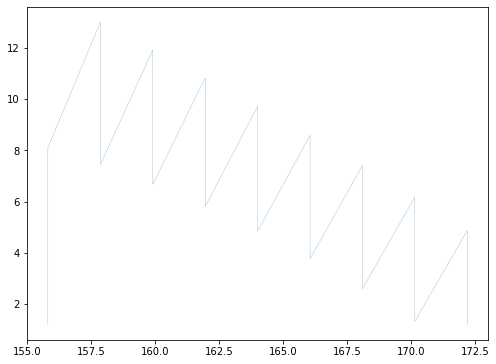

In [202]:
import matplotlib.colors as mcolors
cm = 1/2.54 
figure, axes = plt.subplots(1,figsize=(21*cm, 21*cm),linewidth=1.22)
axes.axis('off')
axes.set_aspect( 1 )
i=1
x,y=drawCircles(
    (360-float(df.loc[i,"alpha"]))*np.pi/180,
    df.loc[i,"VoidRadius(OnPlane)"])
x=[j for j in x]
y=[j for j in y]
maxx=max(x)
y=[j for j in y]
maxy=max(y)
Xsupport=[]
Ysupport=[]
for i in range (1,len(df.index)):
    
    
    cc=np.random.rand(3)
    x,y=drawCircles(
        (360-float(df.loc[i,"alpha"]))*np.pi/180,
        df.loc[i,"VoidRadius(OnPlane)"])
    x=[j for j in x]
    y=[j for j in y]
    if (i % 4 ==1):
        x=[i+maxx*2 for i in x]
    if (i % 4 ==2):
        x=[i+maxx*4 for i in x]
    if (i % 4 ==3):
        x=[i+maxx*6 for i in x]
    axes.plot( x, y,color=cc, linewidth=1.22)
    
    pt1=[x[-1],y[-1]]
    pt1p=[x[0],y[0]]
    
    x,y=drawCircles(
        (360-float(df.loc[i,"alpha"]))*np.pi/180,
        df.loc[i,"VoidRadius(OnPlane)"]+df.loc[i,"couroneRadius(OnPlane)"])
    x=[j for j in x]
    y=[j for j in y]
    
    if (i % 4 ==1):
        x=[i+maxx*2 for i in x]
    if (i % 4 ==2):
        x=[i+maxx*4 for i in x]
    if (i % 4 ==3):
        x=[i+maxx*6 for i in x]
    axes.plot( x, y,color=cc, linewidth=1.22)
    pt2=[x[-1],y[-1]]
    pt2p=[x[0],y[0]]
    axes.plot( [pt1[0],pt2[0]], [pt1[1],pt2[1]],color=cc, linewidth=1.22)
    axes.plot( [pt1p[0],pt2p[0]], [pt1p[1],pt2p[1]],color=cc, linewidth=1.22)
    # adding the support
    Xsupport+=[df.loc[i,"X1"][0]]
    Xsupport+=[df.loc[i,"X2"][0]]
    Ysupport+=[df.loc[i,"X1"][1]]
    Ysupport+=[df.loc[i,"X2"][1]]
    
    #axes.axis('off')
    axes.set_aspect( 1 )
    filename="file/conIm"+str(i)+"png"
    plt.savefig(filename,orientation= 'portrait')
    axes.clear()
minsupportY=min(Ysupport)
maxsupportY=max(Ysupport)
minsupportX=min(Xsupport)
maxsupportX=max(Xsupport)

Xsupport=[minsupportX]+Xsupport
Ysupport=[minsupportY-0.1*abs(minsupportY)]+Ysupport

Xsupport=Xsupport+[maxsupportX]
Ysupport=Ysupport+[minsupportY-0.1*abs(minsupportY)]


maxx=max(Xsupport)
Xsupport=[i+5*maxx for i in Xsupport]
axes.plot(Xsupport,Ysupport,linewidth=0.2)


#axes.axis('off')
axes.set_aspect( 1 )

plt.savefig("file/ConSupport.pdf",orientation= 'portrait')